# <a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/08-Random-Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

En esta notebook analizaremos el clasificador Random Forest. Además, exploraremos la naturaleza colectiva de su funcionamiento analizando elementos individuales del ensamble.

Recuerda la simbología de las secciones:

* 🔽 Esta sección no forma parte del proceso usual de Machine Learning. Es una exploración didáctica de algún aspecto del funcionamiento del algoritmo.
* ⚡ Esta sección incluye técnicas más avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ⭕ Esta sección contiene un ejercicio o práctica a realizar. Aún si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.


<img src="https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/img/random-forest.jpeg">

## Ejemplo 1: MNIST

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(f"Accuracy entrenamiento: {clf.score(X_train,y_train)}")
print(f"Accuracy prueba: {clf.score(X_test,y_test)}")

Accuracy entrenamiento: 1.0
Accuracy prueba: 0.9740740740740741


Observa como ya no tenemos señales de overfitting como en el caso del Decision Tree.

Accuracy: 0.974
Recall: 0.975
Precision: 0.975


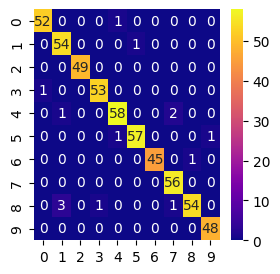

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

## Ejemplo 2: PIMA dataset

### El conjunto de datos

Este dataset fue creado por el *National Institute of Diabetes and Digestive and Kidney Diseases* de Estados Unidos. El objetivo del dataset es predecir el diagnostico de cuándo un paciente tiene diabetes o no, basado en ciertas mediciones incluidas en el dataset. Varias restricciones fueron usadas en la selección de estas instancias para filtrar el dataset. En particular, se trata pacientes femeninas de al menos 21 años de edad pertenecientes al grupo indígena Pima de Arizona.

Las variables incluidas son el numero de embarazos la paciente ha tenido, su BMI, nivel de insulina, edad, entre otras.

El dataset se encuentra en https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Preprocesamiento y Entrenamiento

In [ ]:
# ----- Definimos las features
feature_cols = df.columns.to_list()

X = df[feature_cols].values    # Features
y = df['label'].values         # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

clf = RandomForestClassifier(n_jobs=-1)

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)    # Predecimos usando el conjunto de prueba

¿Cómo lo hizo en el conjunto de prueba?

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_train_pred = clf.predict(X_train)

print(f"Accuracy: {round(accuracy_score(y_train,y_train_pred),3)}")
print(f"Recall: {round(recall_score(y_train,y_train_pred),3)}")
print(f"Precision: {round(precision_score(y_train,y_train_pred),3)}")

print(f"Accuracy, usando el método score: {clf.score(X_train,y_train)}")

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Accuracy, usando el método score: 1.0


### Resultados

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


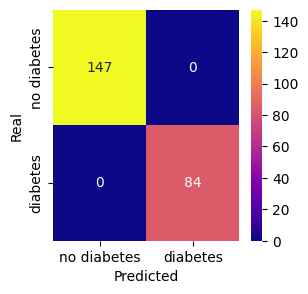

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['no diabetes','diabetes']

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

Podemos obtener la importancia de las features de acuerdo a la reducción de impureza de los nodos donde participan.

In [ ]:
import numpy as np

importances = pd.DataFrame({'feature':feature_cols,'importancia':np.round(clf.feature_importances_,3)})
importances.sort_values(by='importancia',ascending=False,inplace=True)
importances.set_index('feature')

,importancia
feature,
label,0.786
glucose,0.089
bmi,0.040
age,0.036
pedigree,0.017
pregnant,0.010
insulin,0.008
skin,0.007
bp,0.006


### 🔽 Exploración del random forest

Podemos explorar el conjunto de árboles de decisión construidos por el random forest mediante la lista `estimators_`. Cada elemento de esta lista es un árbol de decisión como los que usamos la sesión pasada.

¿Cuántos árboles se usaron?

In [ ]:
print(f"Número de árboles: {len(clf.estimators_)}")

Número de árboles: 100


Analicemos la predicción para un elemento arbitrario de X_test

In [ ]:
import numpy as np

idx0 = 37
new_x = X_test[idx0]
print(f"Etiqueta real: {y_test[idx0]}, Preddición: {y_pred[idx0]}")

predicciones = []
for dt in clf.estimators_:
    predicted_label = int(dt.predict([X_test[idx0]])[0])  # No podemos pasar sólo un renglón de X_test, tiene que ser una matriz, por lo que pasamos una matriz de tamaño 1 x num_features
    predicciones.append(predicted_label)

# #Usando list comprehension:
# predicciones = [int(dt.predict([X_test[idx0]])[0]) for dt in clf.estimators_]

print(f"Las primeras 10 predicciones: {predicciones[:10]}")

# ---- Contamos cuántos votos tuvo cada etiqueta por parte del bosque ----

zeros = np.where(np.array(predicciones)==0)[0]
ones = np.where(np.array(predicciones)==1)[0]

print(f"{zeros.shape[0]} árboles que predijeron la etiqueta 0:\n{zeros}\n")
print(f"{ones.shape[0]} Árboles que predijeron la etiqueta 1:\n{ones}\n")

Etiqueta real: 0, Preddición: 0
Las primeras 10 predicciones: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
100 árboles que predijeron la etiqueta 0:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

0 Árboles que predijeron la etiqueta 1:
[]



Exploremos un árbol arbitrario del ensamble.

In [ ]:
from sklearn import tree

dt = clf.estimators_[1]

print(f"Profundidad del árbol: {dt.get_depth()}")
print(f"Número de hojas del árbol: {dt.get_n_leaves()}")

text_representation = tree.export_text(decision_tree=dt,
                                    feature_names=feature_cols)
# print(text_representation)

Profundidad del árbol: 4
Número de hojas del árbol: 8


Exploremos estadísticamente todos los árboles individuales del ensamble

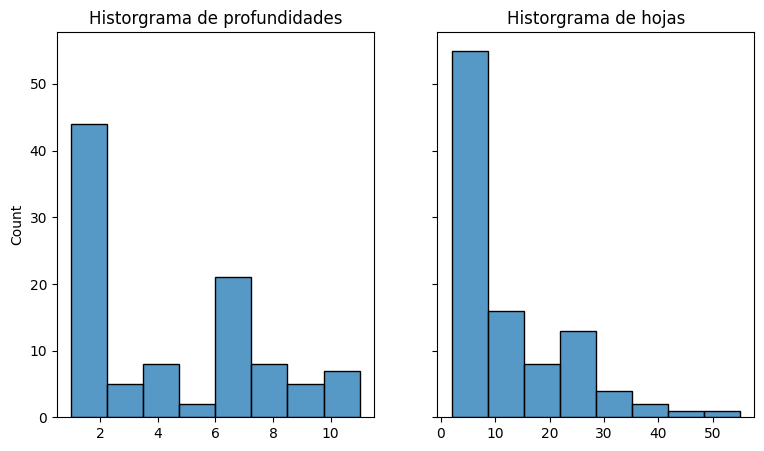

In [ ]:
import seaborn as sns

profundidades = [dt.get_depth() for dt in clf.estimators_]
hojas = [dt.get_n_leaves() for dt in clf.estimators_]

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].set_title("Historgrama de profundidades")
sns.histplot(profundidades,ax=axs[0])
axs[1].set_title("Historgrama de hojas")
sns.histplot(hojas,ax=axs[1])
fig.show()


## Comparación con el DecisionTreeClassifier

### ⭕ **Práctica**:

Este es un pequeño ejercicio para prácticar la comparación de dos modelos y el uso de atributos de clases.

1. Encuentra el árbol del ensamble con el mejor rendimiento del ensamble del bosque aleatorio, esto con respecto al accuracy
2. Compáralo con el mejor árbol de decisión que obtuviste en la sesión pasada:
    * Compara la profundidad y número de hojas de ambos.
    * Compara los rendimientos de ambos usando las métricas Accuracy, Precision, Recall y F1-score.
    * Compara las matrices de confusión de ambos.